<a href="https://colab.research.google.com/github/mnsosa/argentina_programa/blob/master/notebooks/Pandas%2C_ML%2C_RegLog%C3%ADstica_y_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión logística y regresión lineal

## Proyecto de Machine Learning

Los principales pasos que se deben seguir cuando uno comienza un proyeco de machine learning son:

1. Ver el _big picture_
1. Buscar _insights_ en los datos, explorándolos, visualizándolos
1. Preparar los datos para el modelo de machine learning
1. Seleccionar un modelo y entrenarlo
1. Seguir ajustando el modelo, buscar hiperparámetros
1. Presentar la solución

In [1]:
# importamos las librerías a usar. Para esta etapa, usaremos pandas
import pandas as pd

#### ¿Qué es pandas?

Es la librería más conocida para manipular datos en Python. El formato más utilizado es el de Dataframe y se podría decir que es el Excel de Python.

Pandas también ofrece una serie de herramientas y métodos para manipular y analizar datos de manera eficiente. Esto incluye funciones para realizar operaciones estadísticas básicas, como la agregación y la visualización de datos

#### Dataframes

La principal característica de Pandas es su estructura de datos de alto nivel, que se conoce como DataFrame. Un DataFrame de Pandas es similar a una hoja de cálculo en un programa como Microsoft Excel, pero tiene capacidades y funcionalidades adicionales que lo hacen muy útil para el análisis de datos.


Descarguemos los datos usando Git, por ahora sólo ejecuten la siguiente celda.

### 0. Obtener los datos

In [2]:
!git clone https://github.com/mnsosa/argentina_programa.git

fatal: destination path 'argentina_programa' already exists and is not an empty directory.


In [3]:
datos_cardiacos = pd.read_csv("/content/argentina_programa/datos/heart_failure_clinical_records_dataset.csv")
datos_cardiacos

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

#### Cuestiones básicas de Pandas 🐼

In [4]:
# veamos el tipo de dato
type(datos_cardiacos)

pandas.core.frame.DataFrame

In [5]:
# obtener una columna del dataframe
datos_cardiacos["age"]

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

In [6]:
# contar valores de una columna
datos_cardiacos["anaemia"].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [7]:
datos_cardiacos["diabetes"].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [8]:
datos_cardiacos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
# da verdadero o falso según ambas columnas sean iguales
# (o no tienen nada o tienen ambos)
datos_cardiacos["anaemia"] == datos_cardiacos["diabetes"]
# a esto se le llama "máscara", se refiere a una serie booleana

0       True
1       True
2       True
3      False
4       True
       ...  
294    False
295     True
296    False
297     True
298     True
Length: 299, dtype: bool

In [10]:
# las máscaras pueden usarse para filtrar filas de un dataframe según
# sean 0 o 1 los valores de la máscara (solo toma las filas donde hay 1)

mascara = datos_cardiacos["anaemia"] == datos_cardiacos["diabetes"]

datos_cardiacos[mascara]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
4    65.0        1                       160         1                 20   
7    60.0        1                       315         1                 60   
..    ...      ...                       ...       ...                ...   
291  60.0        0                       320         0                 35   
293  63.0        1                       103         1                 35   
295  55.0        0                      1820         0                 38   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
4                      0  327000.00               2.7           116    0   
7                      0  454000.00               1.1           131    1   
..                   ...        ...               ...           ...  ...   
291                    0  133000.00               1.4           139    1   
293                    0  179000.00               0.9           136    1   
295                    0  270000.00               1.2           139    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
4          0     8            1  
7          1    10            1  
..       ...   ...          ...  
291        0   258            0  
293        1   270            0  
295        0   271            0  
297        1   280            0  
298        1   285            0  

[151 rows x 13 columns]

In [11]:
datos_cardiacos[mascara]["anaemia"].value_counts()

0    98
1    53
Name: anaemia, dtype: int64

In [12]:
# cuántos tienen presión cardíaca alta?
datos_cardiacos["high_blood_pressure"].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

## Regresión logística (clasificación)

### 1. Tratamiento de datos

Hay que elegir qué variable predecir y con qué entradas.

En este ejemplo, claro está que podríamos predecir si una persona murió o no según los datos.

Propongo
- Salida: si murió
- Entrada: datos de salud de la persona

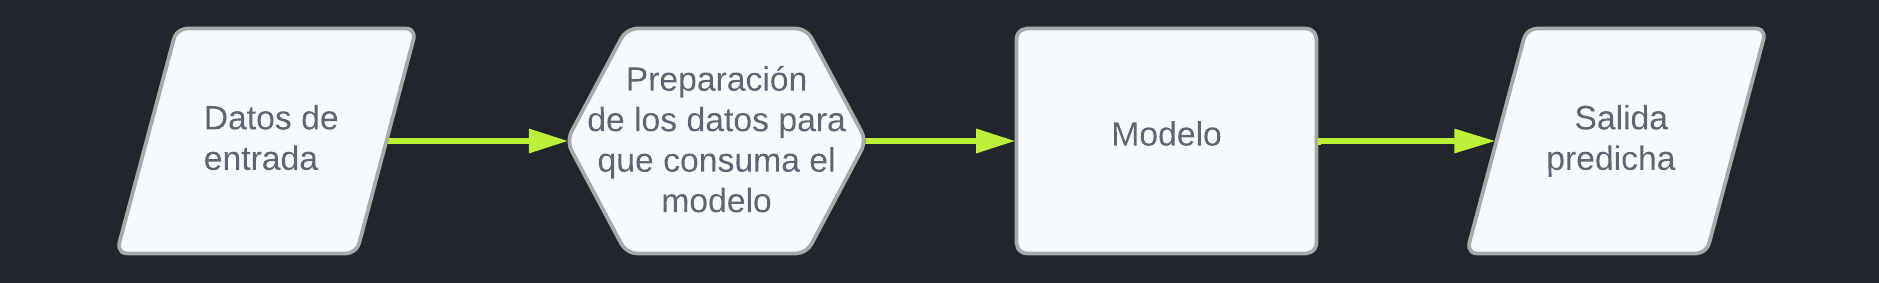

In [13]:
datos_cardiacos.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

No estoy seguro de qué es "time", así que por las dudas lo saco y queda todo transparente.

In [14]:
datos_cardiacos = datos_cardiacos.drop("time", axis=1)
datos_cardiacos.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  DEATH_EVENT  
0        0            1  
1        0            1  
2        1            1  
3        0            1  
4        0            1

Revisemos las variables categóricas, como ser anaemia, diabetes, sex, high_blood_pressure,
smoking, DEATH_EVENT

In [15]:
datos_cardiacos["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [16]:
datos_cardiacos["anaemia"].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [17]:
datos_cardiacos["diabetes"].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [18]:
datos_cardiacos["sex"].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [19]:
datos_cardiacos["high_blood_pressure"].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [20]:
datos_cardiacos["smoking"].value_counts()

0    203
1     96
Name: smoking, dtype: int64

Inspeccionemos la variable `ejection_fraction`

In [21]:
datos_cardiacos["ejection_fraction"].min(), datos_cardiacos["ejection_fraction"].max()

(14, 80)

#### Escalado de variables

A todas las variables numéricas las vamos a trabajar para que todas estén en la misma escala.

En este caso, todas estarán entre 0 y 1.

In [22]:
variables_numericas = [
    "age",
    "creatinine_phosphokinase",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium"
]

In [23]:
datos_cardiacos[variables_numericas]

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1.9           137  
4                 2.7           116  
..                ...           ...  
294               1.1           143  
295               1.2           139  
296               0.8           138  
297               1.4           140  
298               1.6           136  

[299 rows x 6 columns]

### Entrenamiento de modelo de regresión logística

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
# separo en mis datos en conjuntos de train y test
y = datos_cardiacos["DEATH_EVENT"]
X = datos_cardiacos.drop("DEATH_EVENT", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# uso un escalador de minmax
scaler = MinMaxScaler()

# se buscan los máximos y mínimos del conjunto de entrenamiento y con eso
# se transforman los datos
X_train_scaled = scaler.fit_transform(X_train)

# aplicamos la transformación al de prueba
X_test_scaled = scaler.transform(X_test)

In [27]:
# creo al modelo logístico
modelo_logistico = LogisticRegression()

# entreno
modelo_logistico.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
# hago pruebas con el test escalado
y_pred = modelo_logistico.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [29]:
y_test.values

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [30]:
accuracy_score(y_test, y_pred)

0.6833333333333333

### Regresión lineal (regresión)

Buscamos predecir una variable numérica, como puede ser la edad.

Entonces, la salida del modelo es la edad, y la entrada del modelo es todo el resto, incluso si la persona murió o no.

In [31]:
datos_cardiacos

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  DEATH_EVENT  
0          0            1  
1          0            1  
2          1            1  
3          0            1  
4          0            1  
..       ...          ...  
294        1            0  
295        0            0  
296        0            0  
297        1            0  
298        1            0  

[299 rows x 12 columns]

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# separo variable objetivo de entrada al modelo
X = datos_cardiacos.drop('age', axis=1)
y = datos_cardiacos['age']

# divido en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_lineal = LinearRegression()

modelo_lineal.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
y_pred = modelo_lineal.predict(X_test_scaled)

# error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R-squared):", r2)

Error cuadrático medio (MSE): 129.31270941510735
Coeficiente de determinación (R-squared): 0.009823045929786334


In [39]:
y_pred

array([58.06822938, 59.82113342, 63.97216468, 70.62168351, 57.9179268 ,
       54.66097289, 68.41724192, 58.34139425, 69.68891608, 59.18681066,
       61.37839141, 69.70059749, 66.55473447, 59.20348859, 59.61783577,
       61.17997719, 61.99434828, 58.93046124, 68.01746044, 68.57953627,
       57.14880265, 59.71085846, 59.35699188, 68.04455195, 65.41435565,
       59.04075159, 56.4852473 , 59.77538838, 65.02164552, 61.87265829,
       66.13455039, 60.8309114 , 55.45876155, 63.34485096, 64.70360478,
       69.45984856, 69.87856444, 66.9438933 , 58.6357513 , 59.84484183,
       65.762031  , 63.24646492, 59.11166376, 59.3746908 , 58.14657724,
       56.60321128, 55.57210993, 53.84570319, 55.63643848, 61.0180384 ,
       67.42478304, 66.54693403, 63.63466187, 57.99702766, 56.34752105,
       57.11565332, 58.0889173 , 63.43373554, 55.75684863, 63.34576148])

In [38]:
y_test.values

array([70., 50., 45., 80., 42., 50., 60., 45., 90., 50., 70., 77., 58.,
       65., 60., 45., 64., 63., 45., 80., 60., 60., 64., 51., 70., 45.,
       70., 60., 48., 75., 45., 55., 50., 75., 50., 60., 70., 45., 55.,
       42., 60., 60., 65., 70., 53., 65., 70., 65., 55., 63., 72., 50.,
       59., 40., 70., 65., 54., 80., 49., 72.])